In [44]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import pickle

%matplotlib inline

In [6]:
data = pd.read_csv('data/spam.csv', encoding='latin-1')
data = data.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
data.columns = ["category", "text"]

In [8]:
data.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


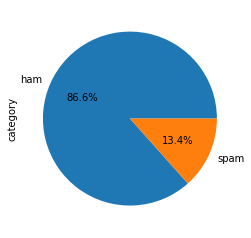

In [11]:
data['category'].value_counts().plot(kind='pie', autopct = '%1.1f%%')

In [22]:
data['target'] = np.where(data['category'] == 'spam',1,0)

In [24]:
data.head()

,category,text,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'],random_state=0)

In [27]:
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)

NB = MultinomialNB(alpha = 0.1)
NB.fit(X_train_vectorized, y_train)

preds = NB.predict(X_test_vectorized)

score = roc_auc_score(y_test, preds)
print(score)

0.9720812182741116


In [45]:
with open("vectorizer.pkl", 'wb') as handle: 
    pickle.dump(vect, handle)

In [46]:
vect2 = pickle.load(open("vectorizer.pkl", "rb" ) )

In [50]:
x = vect.transform(['free porn xxx', 'whatsup dude'])
NB.predict(x)

array([1, 0])

In [51]:
with open("model.pkl", 'wb') as handle: 
    pickle.dump(NB, handle)

In [52]:
nb = pickle.load(open("model.pkl", "rb" ) )

In [53]:
nb.predict(x)

array([1, 0])